## Disclaimer & Credits

In this kernel, I have attempted to re-implement the code for the third chapter of **Aurélien Géron's** amazing book [Hands-on Machine Learning with Scikit-Learn, Keras and Tensorflow](https://github.com/ageron/handson-ml2). You can find his detailed jupyter notebooks for each chapter in the link mentioned before. This notebook is primarily a way for me to internalize the content shared in each chapter of the book, and I hope it is useful to you. 


**Note:** _The code and content here is contained in the notebooks linked above. I have done my best not to include anything present in his book but not present in the notebooks._

### 1. MNIST Classifier with > 97% Accuracy

In [1]:
import pandas as pd
import numpy as np
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)
folder_path = "datasets/mnist"
file_path_test = os.path.join(folder_path, "mnist_test.csv")
file_path_train = os.path.join(folder_path, "mnist_test.csv")
test = pd.read_csv(file_path_test)
train = pd.read_csv(file_path_train)

ModuleNotFoundError: No module named 'pandas'

In [12]:
X_train, y_train = train.drop(labels=["label"],axis=1),  train["label"]
X_test, y_test = test.drop(labels=["label"],axis=1),  test["label"]

In [13]:
X_train = X_train.values.reshape(-1, 784)
X_test = X_test.values.reshape(-1, 784)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = [{'weights': ["distance"], 'n_neighbors': [3, 4, 5]}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...n_neighbors=4, weights=distance;, score=0.930 total time=   1.5s
[CV 5/5] END ...n_neighbors=4, weights=distance;, score=0.968 total time=   1.5s
[CV 4/5] END ...n_neighbors=4, weights=distance;, score=0.966 total time=   1.5s
[CV 2/5] END ...n_neighbors=4, weights=distance;, score=0.938 total time=   1.5s
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.932 total time=   1.4s
[CV 3/5] END ...n_neighbors=4, weights=distance;, score=0.945 total time=   1.5s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.968 total time=   1.6s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.929 total time=   1.6s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.965 total time=   1.6s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.932 total time=   1.5s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.931 total time=   1.6s
[CV 3/5] END ...n_neighbors=3, weights=distance;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 4, 5], 'weights': ['distance']}],
             verbose=3)

In [15]:
# What are the best parameters?
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [16]:
# What's the best score?
grid_search.best_score_

0.9492

In [17]:
# Did we achieve the target?
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### 2. Data Augmentation and Re-evaluation

In [18]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

/var/folders/s3/9552g_5j4bg7zm2wcp_ldt4h0000gn/T/ipykernel_94628/97103598.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


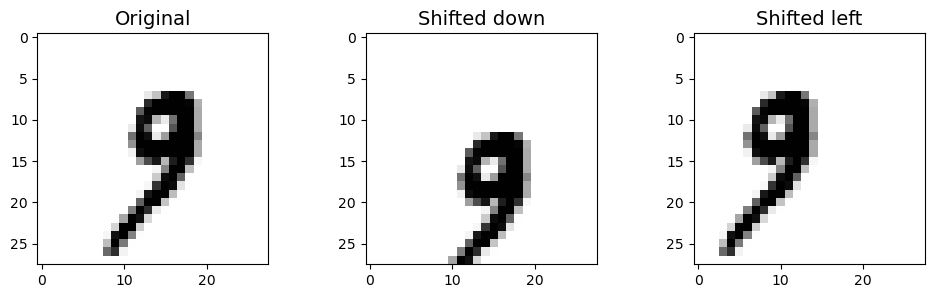

In [19]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [20]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [21]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [22]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [23]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [24]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0